Predictive Modeling

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [2]:
#Get Population Data of each Country from csv
df_population = pd.read_csv('Population_Global.csv')

df_population.drop(columns = ['Rank', 'pop2019', 'GrowthRate', 'area'], inplace=True)
df_population = df_population.rename(columns={"name": "Country/Region", "pop2020": "Population"})
df_population.sort_values('Country/Region', inplace=True)
df_population.reset_index(drop=True, inplace=True)
df_population

,Country/Region,Population,Density
0,Afghanistan,38928.346,58.3257
1,Albania,2877.797,100.2128
2,Algeria,43851.044,18.0763
3,American Samoa,55.191,277.9497
4,Andorra,77.265,164.8333
...,...,...,...
227,Wallis and Futuna,11.239,80.5070
228,Western Sahara,597.339,2.1897
229,Yemen,29825.964,55.2343
230,Zambia,18383.955,23.7321


In [3]:
df_population.replace({'United States': 'US'}, inplace=True)

In [4]:
#Read Covid_19 Data from git csv
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(url)

In [5]:
# Process Data
df.drop(columns = ['Province/State', 'Lat', 'Long'], inplace=True)
df = df.groupby('Country/Region', sort=True).sum()
df.drop(df.columns.difference(['Country/Region','6/26/20']), axis=1, inplace=True)
df.reset_index(inplace=True)
df = df.rename(columns={"6/26/20": "Total_Confirm_Number"})
df

,Country/Region,Total_Confirm_Number
0,Afghanistan,30451
1,Albania,2269
2,Algeria,12685
3,Andorra,855
4,Angola,212
...,...,...
183,West Bank and Gaza,1557
184,Western Sahara,10
185,Yemen,1089
186,Zambia,1531


In [6]:
#Procee dispute of Countries Name between two data resource
#Czech Republic
df.replace({'Czechia':'Czech Republic'}, inplace=True)

In [7]:
#Merge Two Dataframe Data
result = df.merge(df_population, on='Country/Region')
result

,Country/Region,Total_Confirm_Number,Population,Density
0,Afghanistan,30451,38928.346,58.3257
1,Albania,2269,2877.797,100.2128
2,Algeria,12685,43851.044,18.0763
3,Andorra,855,77.265,164.8333
4,Angola,212,32866.272,25.5276
...,...,...,...,...
169,Vietnam,353,97338.579,291.2398
170,Western Sahara,10,597.339,2.1897
171,Yemen,1089,29825.964,55.2343
172,Zambia,1531,18383.955,23.7321


In [8]:
#Drop Data that too Small
#result.drop(result[result['Population'] <4000.000 ].index , inplace=True)
#result.drop(result[result['Total_Confirm_Number'] <1500 ].index , inplace=True)

In [9]:
result['Diagnosis_Rate_PerThousand'] = result['Total_Confirm_Number']/result['Population']
result.sort_values('Diagnosis_Rate_PerThousand', ascending=False, inplace=True)
result.reset_index(inplace=True, drop=True)
result

,Country/Region,Total_Confirm_Number,Population,Density,Diagnosis_Rate_PerThousand
0,Qatar,92784,2881.053,244.4387,32.204892
1,San Marino,698,33.931,555.0820,20.571159
2,Bahrain,24805,1701.575,2145.3229,14.577671
3,Chile,263360,19116.201,25.0655,13.776796
4,Andorra,855,77.265,164.8333,11.065812
...,...,...,...,...,...
169,Cambodia,139,16718.965,91.0683,0.008314
170,Angola,212,32866.272,25.5276,0.006450
171,Vietnam,353,97338.579,291.2398,0.003627
172,Laos,19,7275.560,30.2764,0.002611


In [10]:
#Mark Diagnosis_Rate_PerThousand as D_Level 1-3
#D_Level 1 (DRP =< 1)
#D_Level 2 (1< DRP =< 10)
#D_Level 3 (DRP > 10)

In [11]:
result['DRP_Level'] = 0.00

In [12]:
result.loc[result['Diagnosis_Rate_PerThousand'] > 10, ['DRP_Level']]=3.00
result.loc[result['Diagnosis_Rate_PerThousand'] <= 10, ['DRP_Level']]=2.00
result.loc[result['Diagnosis_Rate_PerThousand'] <= 1, ['DRP_Level']]=1.00

In [13]:
result

,Country/Region,Total_Confirm_Number,Population,Density,Diagnosis_Rate_PerThousand,DRP_Level
0,Qatar,92784,2881.053,244.4387,32.204892,3.0
1,San Marino,698,33.931,555.0820,20.571159,3.0
2,Bahrain,24805,1701.575,2145.3229,14.577671,3.0
3,Chile,263360,19116.201,25.0655,13.776796,3.0
4,Andorra,855,77.265,164.8333,11.065812,3.0
...,...,...,...,...,...,...
169,Cambodia,139,16718.965,91.0683,0.008314,1.0
170,Angola,212,32866.272,25.5276,0.006450,1.0
171,Vietnam,353,97338.579,291.2398,0.003627,1.0
172,Laos,19,7275.560,30.2764,0.002611,1.0


In [14]:
result.loc[result['Country/Region']=='China']

,Country/Region,Total_Confirm_Number,Population,Density,Diagnosis_Rate_PerThousand,DRP_Level
147,China,84725,1439323.776,147.7068,0.058864,1.0


In [15]:
#KNN
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [16]:
result['DRP_Level'].value_counts()

1.0    111
2.0     57
3.0      6
Name: DRP_Level, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde55e2a7f0>]],
      dtype=object)

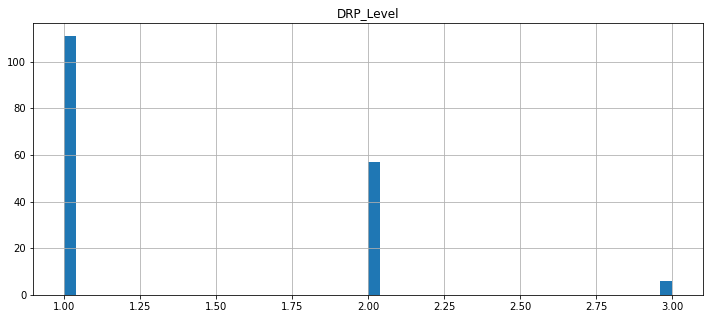

In [17]:
result.hist(column='DRP_Level', bins=50, figsize=(12, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde55c80390>]],
      dtype=object)

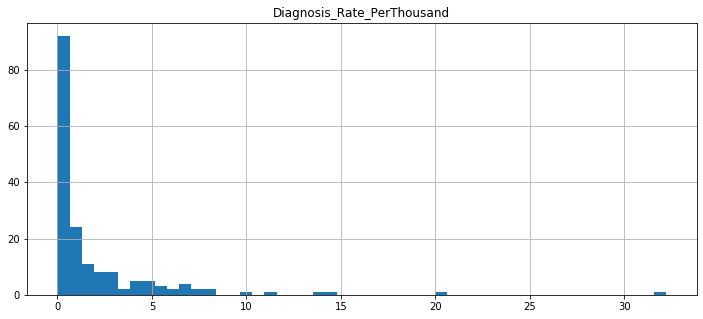

In [18]:
result.hist(column='Diagnosis_Rate_PerThousand', bins=50, figsize=(12, 5))

In [19]:
X = result[['Total_Confirm_Number', 'Diagnosis_Rate_PerThousand', 'Density']].values
X[0:5]

array([[9.27840000e+04, 3.22048918e+01, 2.44438700e+02],
       [6.98000000e+02, 2.05711591e+01, 5.55082000e+02],
       [2.48050000e+04, 1.45776707e+01, 2.14532290e+03],
       [2.63360000e+05, 1.37767959e+01, 2.50655000e+01],
       [8.55000000e+02, 1.10658125e+01, 1.64833300e+02]])

In [20]:
y = result['DRP_Level'].values
y[0:5]

array([3., 3., 3., 3., 3.])

In [21]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (156, 3) (156,)
Test set: (18, 3) (18,)


In [23]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
yhat = neigh.predict(X_test)

In [25]:
yhat

array([1., 1., 1., 1., 2., 1., 2., 1., 3., 1., 1., 1., 2., 1., 1., 1., 1.,
       1.])

In [26]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9551282051282052
Test set Accuracy:  1.0


In [27]:
#Get the Best K
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.94444444,
       0.94444444, 0.94444444, 0.94444444, 0.94444444, 0.94444444,
       0.94444444, 0.94444444, 0.94444444, 0.94444444])

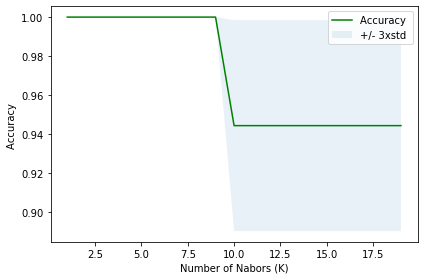

In [28]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [29]:
#Use Global Model to predict US

In [30]:
#Read US each State Population
df_usp = pd.read_csv('Population_US.csv')
df_usp.drop(df_usp.columns.difference(['State', 'Pop', 'density']), axis=1, inplace=True)
df_usp.rename(columns={'State': 'Province_State', 'Pop': 'Population', 'density': 'Density'}, inplace=True)

In [31]:
#Read US Data
url_US = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
df_US = pd.read_csv(url_US)
df_US.drop(df_US.columns.difference(['Province_State', '6/26/20']), axis=1, inplace=True)
df_US = df_US.groupby('Province_State', sort=True).sum()
df_US.rename(columns={'6/26/20': 'Total_Confirm_Number'}, inplace=True)
df_US.reset_index(inplace=True)

In [32]:
result_us = df_US.merge(df_usp, on='Province_State')
result_us['Diagnosis_Rate_PerThousand'] = (result_us['Total_Confirm_Number']*1000)/result_us['Population']
result_us

,Province_State,Total_Confirm_Number,Population,Density,Diagnosis_Rate_PerThousand
0,Alabama,34183,4908621,96.9221,6.963870
1,Alaska,833,734002,1.2863,1.134874
2,Arizona,66659,7378494,64.9550,9.034228
3,Arkansas,18740,3038999,58.4030,6.166504
4,California,206844,39937489,256.3727,5.179194
5,Colorado,31780,5845526,56.4011,5.436636
6,Connecticut,46059,3563077,735.8689,12.926748
7,Delaware,11017,982895,504.3073,11.208725
8,District of Columbia,10185,720687,11814.5410,14.132349
9,Florida,122960,21992985,410.1256,5.590874


In [33]:
X_us = result_us[['Total_Confirm_Number', 'Diagnosis_Rate_PerThousand', 'Density']].values

In [34]:
yhat_us = neigh.predict(X_us)
yhat_us

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2.])

In [35]:
#Add Real US DRP_Level
result_us['DRP_Level'] = 0.00
result_us.loc[result_us['Diagnosis_Rate_PerThousand'] > 10, ['DRP_Level']]=3.00
result_us.loc[result_us['Diagnosis_Rate_PerThousand'] <= 10, ['DRP_Level']]=2.00
result_us.loc[result_us['Diagnosis_Rate_PerThousand'] <= 1, ['DRP_Level']]=1.00
result_us

,Province_State,Total_Confirm_Number,Population,Density,Diagnosis_Rate_PerThousand,DRP_Level
0,Alabama,34183,4908621,96.9221,6.963870,2.0
1,Alaska,833,734002,1.2863,1.134874,2.0
2,Arizona,66659,7378494,64.9550,9.034228,2.0
3,Arkansas,18740,3038999,58.4030,6.166504,2.0
4,California,206844,39937489,256.3727,5.179194,2.0
5,Colorado,31780,5845526,56.4011,5.436636,2.0
6,Connecticut,46059,3563077,735.8689,12.926748,3.0
7,Delaware,11017,982895,504.3073,11.208725,3.0
8,District of Columbia,10185,720687,11814.5410,14.132349,3.0
9,Florida,122960,21992985,410.1256,5.590874,2.0


In [36]:
#Calculate Model Accuracy By US 
y_us = result_us['DRP_Level'].values
print("Test set Accuracy: ", metrics.accuracy_score(y_us, yhat_us))

Test set Accuracy:  0.7692307692307693


In [37]:
result_nus = result_us.loc[result_us['DRP_Level'] != 2.0]
result_nus.reset_index(inplace=True, drop=True)

In [38]:
result_nus

,Province_State,Total_Confirm_Number,Population,Density,Diagnosis_Rate_PerThousand,DRP_Level
0,Connecticut,46059,3563077,735.8689,12.926748,3.0
1,Delaware,11017,982895,504.3073,11.208725,3.0
2,District of Columbia,10185,720687,11814.5410,14.132349,3.0
3,Hawaii,866,1412687,219.9419,0.613016,1.0
4,Illinois,140291,12659682,228.0243,11.081716,3.0
5,Louisiana,54769,4645184,107.5175,11.790491,3.0
6,Maryland,66115,6083116,626.6731,10.868607,3.0
7,Massachusetts,108070,6976597,894.4355,15.490360,3.0
8,Montana,829,1086759,7.4668,0.762819,1.0
9,New Jersey,170584,8936574,1215.1991,19.088299,3.0


In [39]:
#Draw US Table
import seaborn as sns

#Colors elements in a dateframe, green if <= 1 and red if > 10.
def color_negative_red(value):
    if value <= 1:
        color = 'green'
    elif value > 10:
        color = 'red'
    elif value > 10:
        color = 'red'
    else:
        color = 'white'
    return 'color: %s' % color

# Set CSS properties for th elements in dataframe
th_props = [('font-size', '12px'), ('text-align', 'center'), ('font-weight', 'bold'), ('color', '#000000'), ('background-color', '#F5F5F5')]

# Set CSS properties for td elements in dataframe
td_props = [('font-size', '12px')]

# Set Style
styles = [dict(selector="th", props=th_props), dict(selector="td", props=td_props)]

cm = sns.light_palette("yellow", as_cmap=True)
result_nust = result_nus.style.applymap(color_negative_red, subset=['Diagnosis_Rate_PerThousand']).background_gradient(cmap=cm, subset=['DRP_Level']).format({'DRP_Level': "{:.2}"}).set_table_styles(styles)
result_nust

,Province_State,Total_Confirm_Number,Population,Density,Diagnosis_Rate_PerThousand,DRP_Level
0,Connecticut,46059,3563077,735.868900,12.926748,3.0
1,Delaware,11017,982895,504.307300,11.208725,3.0
2,District of Columbia,10185,720687,11814.541000,14.132349,3.0
3,Hawaii,866,1412687,219.941900,0.613016,1.0
4,Illinois,140291,12659682,228.024300,11.081716,3.0
5,Louisiana,54769,4645184,107.517500,11.790491,3.0
6,Maryland,66115,6083116,626.673100,10.868607,3.0
7,Massachusetts,108070,6976597,894.435500,15.490360,3.0
8,Montana,829,1086759,7.466800,0.762819,1.0
9,New Jersey,170584,8936574,1215.199100,19.088299,3.0


In [40]:
#Use Global Model to predict China

In [41]:
#Read Covid_19 Data from git csv
url_c = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_c = pd.read_csv(url)

# Process Data
df_c.drop(columns = ['Lat', 'Long'], inplace=True)
df_c = df_c.loc[df_c['Country/Region']=='China']
df_c.drop(df_c.columns.difference(['Province/State','6/26/20']), axis=1, inplace=True)
df_c.reset_index(inplace=True, drop=True)
df_c = df_c.rename(columns={"6/26/20": "Total_Confirm_Number"})
df_c

,Province/State,Total_Confirm_Number
0,Anhui,991
1,Beijing,891
2,Chongqing,582
3,Fujian,363
4,Gansu,162
5,Guangdong,1637
6,Guangxi,254
7,Guizhou,147
8,Hainan,171
9,Hebei,349


In [42]:
df_cp = pd.read_csv('Population_China.csv')
result_china = df_c.merge(df_cp, on='Province/State')
result_china['Diagnosis_Rate_PerThousand'] = result_china['Total_Confirm_Number']/ result_china['Population']
result_china

,Province/State,Total_Confirm_Number,Population,Density,Diagnosis_Rate_PerThousand
0,Anhui,991,63659.0,429.00,0.015567
1,Beijing,891,21536.0,1322.74,0.041373
2,Chongqing,582,31243.2,374.00,0.018628
3,Fujian,363,39730.0,285.00,0.009137
4,Gansu,162,26474.3,57.00,0.006119
5,Guangdong,1637,115210.0,481.00,0.014209
6,Guangxi,254,49600.0,190.00,0.005121
7,Guizhou,147,36229.5,200.00,0.004057
8,Hainan,171,9447.2,224.00,0.018101
9,Hebei,349,75919.7,355.00,0.004597


In [43]:
X_china = result_china[['Total_Confirm_Number', 'Diagnosis_Rate_PerThousand', 'Density']].values

In [44]:
yhat_china = neigh.predict(X_china)
yhat_china

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [45]:
#Add China's real DRP Level
result_china['DRP_Level'] = 0.00
result_china.loc[result_china['Diagnosis_Rate_PerThousand'] > 10, ['DRP_Level']]=3.00
result_china.loc[result_china['Diagnosis_Rate_PerThousand'] <= 10, ['DRP_Level']]=2.00
result_china.loc[result_china['Diagnosis_Rate_PerThousand'] <= 1, ['DRP_Level']]=1.00

In [46]:
result_china.sort_values('Diagnosis_Rate_PerThousand', ascending=False, inplace=True)
result_china.reset_index(inplace=True, drop=True)
result_china

,Province/State,Total_Confirm_Number,Population,Density,Diagnosis_Rate_PerThousand,DRP_Level
0,Hubei,68135,59270.0,325.00,1.149570,2.0
1,Hong Kong,1196,7500.7,6544.00,0.159452,1.0
2,Macau,46,679.6,20778.00,0.067687,1.0
3,Beijing,891,21536.0,1322.74,0.041373,1.0
4,Shanghai,706,24281.4,3814.00,0.029076,1.0
5,Heilongjiang,947,37513.0,81.00,0.025245,1.0
6,Zhejiang,1269,58500.0,460.00,0.021692,1.0
7,Jiangxi,932,46661.0,247.00,0.019974,1.0
8,Chongqing,582,31243.2,374.00,0.018628,1.0
9,Hainan,171,9447.2,224.00,0.018101,1.0


In [47]:
#Draw China Table

#Colors defination
def color_set(value):
    if value == 1.0:
        color = 'green'
    elif value == 2.0:
        color = 'blue'
    else:
        color = 'red'
    return 'color: %s' % color


# Set CSS properties for th elements in dataframe
th_props = [('font-size', '12px'), ('text-align', 'center'), ('font-weight', 'bold'), ('color', '#000000'), ('background-color', '#F5F5F5')]

# Set CSS properties for td elements in dataframe
td_props = [('font-size', '12px')]

# Set Style
styles = [dict(selector="th", props=th_props), dict(selector="td", props=td_props)]

cm = sns.light_palette("red", as_cmap=True)
result_chinat = result_china.style.applymap(color_set, subset=['DRP_Level']).background_gradient(cmap=cm, subset=['Diagnosis_Rate_PerThousand']).format({'DRP_Level': "{:.2}"}).set_table_styles(styles)
result_chinat

,Province/State,Total_Confirm_Number,Population,Density,Diagnosis_Rate_PerThousand,DRP_Level
0,Hubei,68135,59270.000000,325.000000,1.149570,2.0
1,Hong Kong,1196,7500.700000,6544.000000,0.159452,1.0
2,Macau,46,679.600000,20778.000000,0.067687,1.0
3,Beijing,891,21536.000000,1322.740000,0.041373,1.0
4,Shanghai,706,24281.400000,3814.000000,0.029076,1.0
5,Heilongjiang,947,37513.000000,81.000000,0.025245,1.0
6,Zhejiang,1269,58500.000000,460.000000,0.021692,1.0
7,Jiangxi,932,46661.000000,247.000000,0.019974,1.0
8,Chongqing,582,31243.200000,374.000000,0.018628,1.0
9,Hainan,171,9447.200000,224.000000,0.018101,1.0
